## Постановка задачи

На первой практике вам предстоит поработать с реальными данными об истории экспертиз рабочих программ дисциплин в ИТМО.

**Задача:** сделать краткое исследование данных и построить 3 графика двумя способами. Первый способ - самостоятельно. Второй - с активной помощью ChatGPT. Порядок реализации способов значения не имеет. Библиотеки можно использовать любые.

**Цель:** оценить качество помощи ChatGPT для аналитики.

## Загрузка данных

Загрузим датасет в колаб, найти его также можно в папке [Data](https://drive.google.com/drive/folders/1NklhwWT6KVrtRF9GxnI-Z30QKNtNYae1?usp=share_link).

In [100]:
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import pandas as pd

!gdown 1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8

Downloading...
From: https://drive.google.com/uc?id=1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8
To: /content/exp_stats.csv
100% 925k/925k [00:00<00:00, 116MB/s]


Посмотрим на данные.

In [2]:
data = pd.read_csv("/content/exp_stats.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   workprogram_id     7657 non-null   int64 
 1   user_count         7657 non-null   int64 
 2   expertise_status   7657 non-null   object
 3   expertise_counter  7657 non-null   int64 
 4   approval_date_y    7657 non-null   object
 5   title              7657 non-null   object
dtypes: int64(3), object(3)
memory usage: 359.0+ KB


Всего шесть столбцов, все без пропусков:
- `workprogram_id` - айди рабочей программы (РПД)
- `user_count` - сколько человек принимали участие в создании РПД
- `expertise_status` - на каком этапе экспертизы находится РПД (статус экспертизы: AC - одобрена, RE - на доработке, AR - в архиве, EX - на экспертизе, WK - в работе)
- `expertise_counter` - сколько раз РПД проходила экспертизу
- `approval_date` - день, когда РПД признали удовлетворяющей всем требованиям и разрешили ее реализовывать
- `title` - название дисциплины


In [8]:
data.sample(5)

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
4019,14666,3,AC,1,2022-04-18 09:06:15.271 +0200,Стратегии устойчивого и умного развития городо...
348,19331,2,AC,0,2023-01-13 09:53:34.989 +0100,Оптические измерения
3715,13822,3,AC,0,2022-04-16 12:35:35.157 +0200,Автоматизация технологической подготовки произ...
1636,24115,3,AC,0,2023-01-19 13:34:13.013 +0100,Архитектура предприятия
2791,12000,4,AC,0,2022-01-26 13:28:50.279 +0100,Введение в молекулярную биологию


## Краткое исследование данных

В данных не слишком много столбцов и уже известно, что нет пустых ячеек. Теперь неплохо было бы погрузиться в них и ответить на 3 небольших вопроса:
1. Какой период охватывают данные в датасете?
2. Есть ли в данных нетипичные значения? Например, неположительные числа в столбце `user_count`. Или даты, которые сильно выбиваются из общего диапазона значений.
3. Есть ли нелогичные значения в данных? Например, статус РПД "в работе", но есть `approval_date`. Или статус "одоберно", но РПД 0 раз проходила экспертизу.



In [44]:
df = data
df['date'] = pd.to_datetime(data['approval_date_y'], utc=True)
df = df.drop('approval_date_y', axis = 1)

In [45]:
df.sample(5)

,workprogram_id,user_count,expertise_status,expertise_counter,title,date
289,24140,2,AC,0,Программирование на Java,2023-02-08 15:16:38.671000+00:00
4268,15194,3,AC,0,Отраслевые системы добровольной сертификации,2022-03-23 08:27:29.277000+00:00
1309,4945,3,AC,2,Менеджмент качества,2021-05-16 18:44:54.325000+00:00
4647,15960,6,AC,1,Математика (продвинутый уровень),2022-04-27 11:17:28.510000+00:00
6899,21191,2,AC,2,Термодинамические и тепломассообменные процесс...,2022-05-07 01:18:43.763000+00:00


In [46]:
data.dtypes

workprogram_id                     int64
user_count                         int64
expertise_status                  object
expertise_counter                  int64
approval_date_y                   object
title                             object
date                 datetime64[ns, UTC]
dtype: object

In [64]:
df['dates_only'] = df['date'].dt.date
distribution = df['dates_only'].value_counts().sort_index()
fig = go.Figure(data=[go.Bar(x=distribution.index, y=distribution.values)])

fig.update_layout(title='Распределение по датам',
                  xaxis_title='Дата',
                  yaxis_title='Количество')

In [61]:
distribution_expertise = df['expertise_status'].value_counts().sort_index()

fig = go.Figure(data=[go.Bar(x=distribution_expertise.index, y=distribution_expertise.values,
                      text = distribution_expertise.values, textposition = 'outside')])
fig

In [ ]:
data.describe()

,workprogram_id,user_count,expertise_counter
count,7657.000000,7657.000000,7657.000000
mean,15044.539768,3.386052,0.948936
std,6357.130608,2.066325,1.149317
min,2626.000000,1.000000,0.000000
25%,11000.000000,2.000000,0.000000
50%,15976.000000,3.000000,1.000000
75%,20048.000000,4.000000,1.000000
max,25081.000000,17.000000,10.000000


In [ ]:
# 1. Какой период охватывают данные в датасете?
data['approval_date_y'] = pd.to_datetime(data['approval_date_y'], utc=True)
print(f'Данные представлены в диапазоне: {data.approval_date_y.min().strftime("%Y-%m-%d")} - {data.approval_date_y.max().strftime("%Y-%m-%d")}. То есть почти за 2 года.')

Данные представлены в диапазоне: 2021-04-21 - 2023-04-17. То есть почти за 2 года.


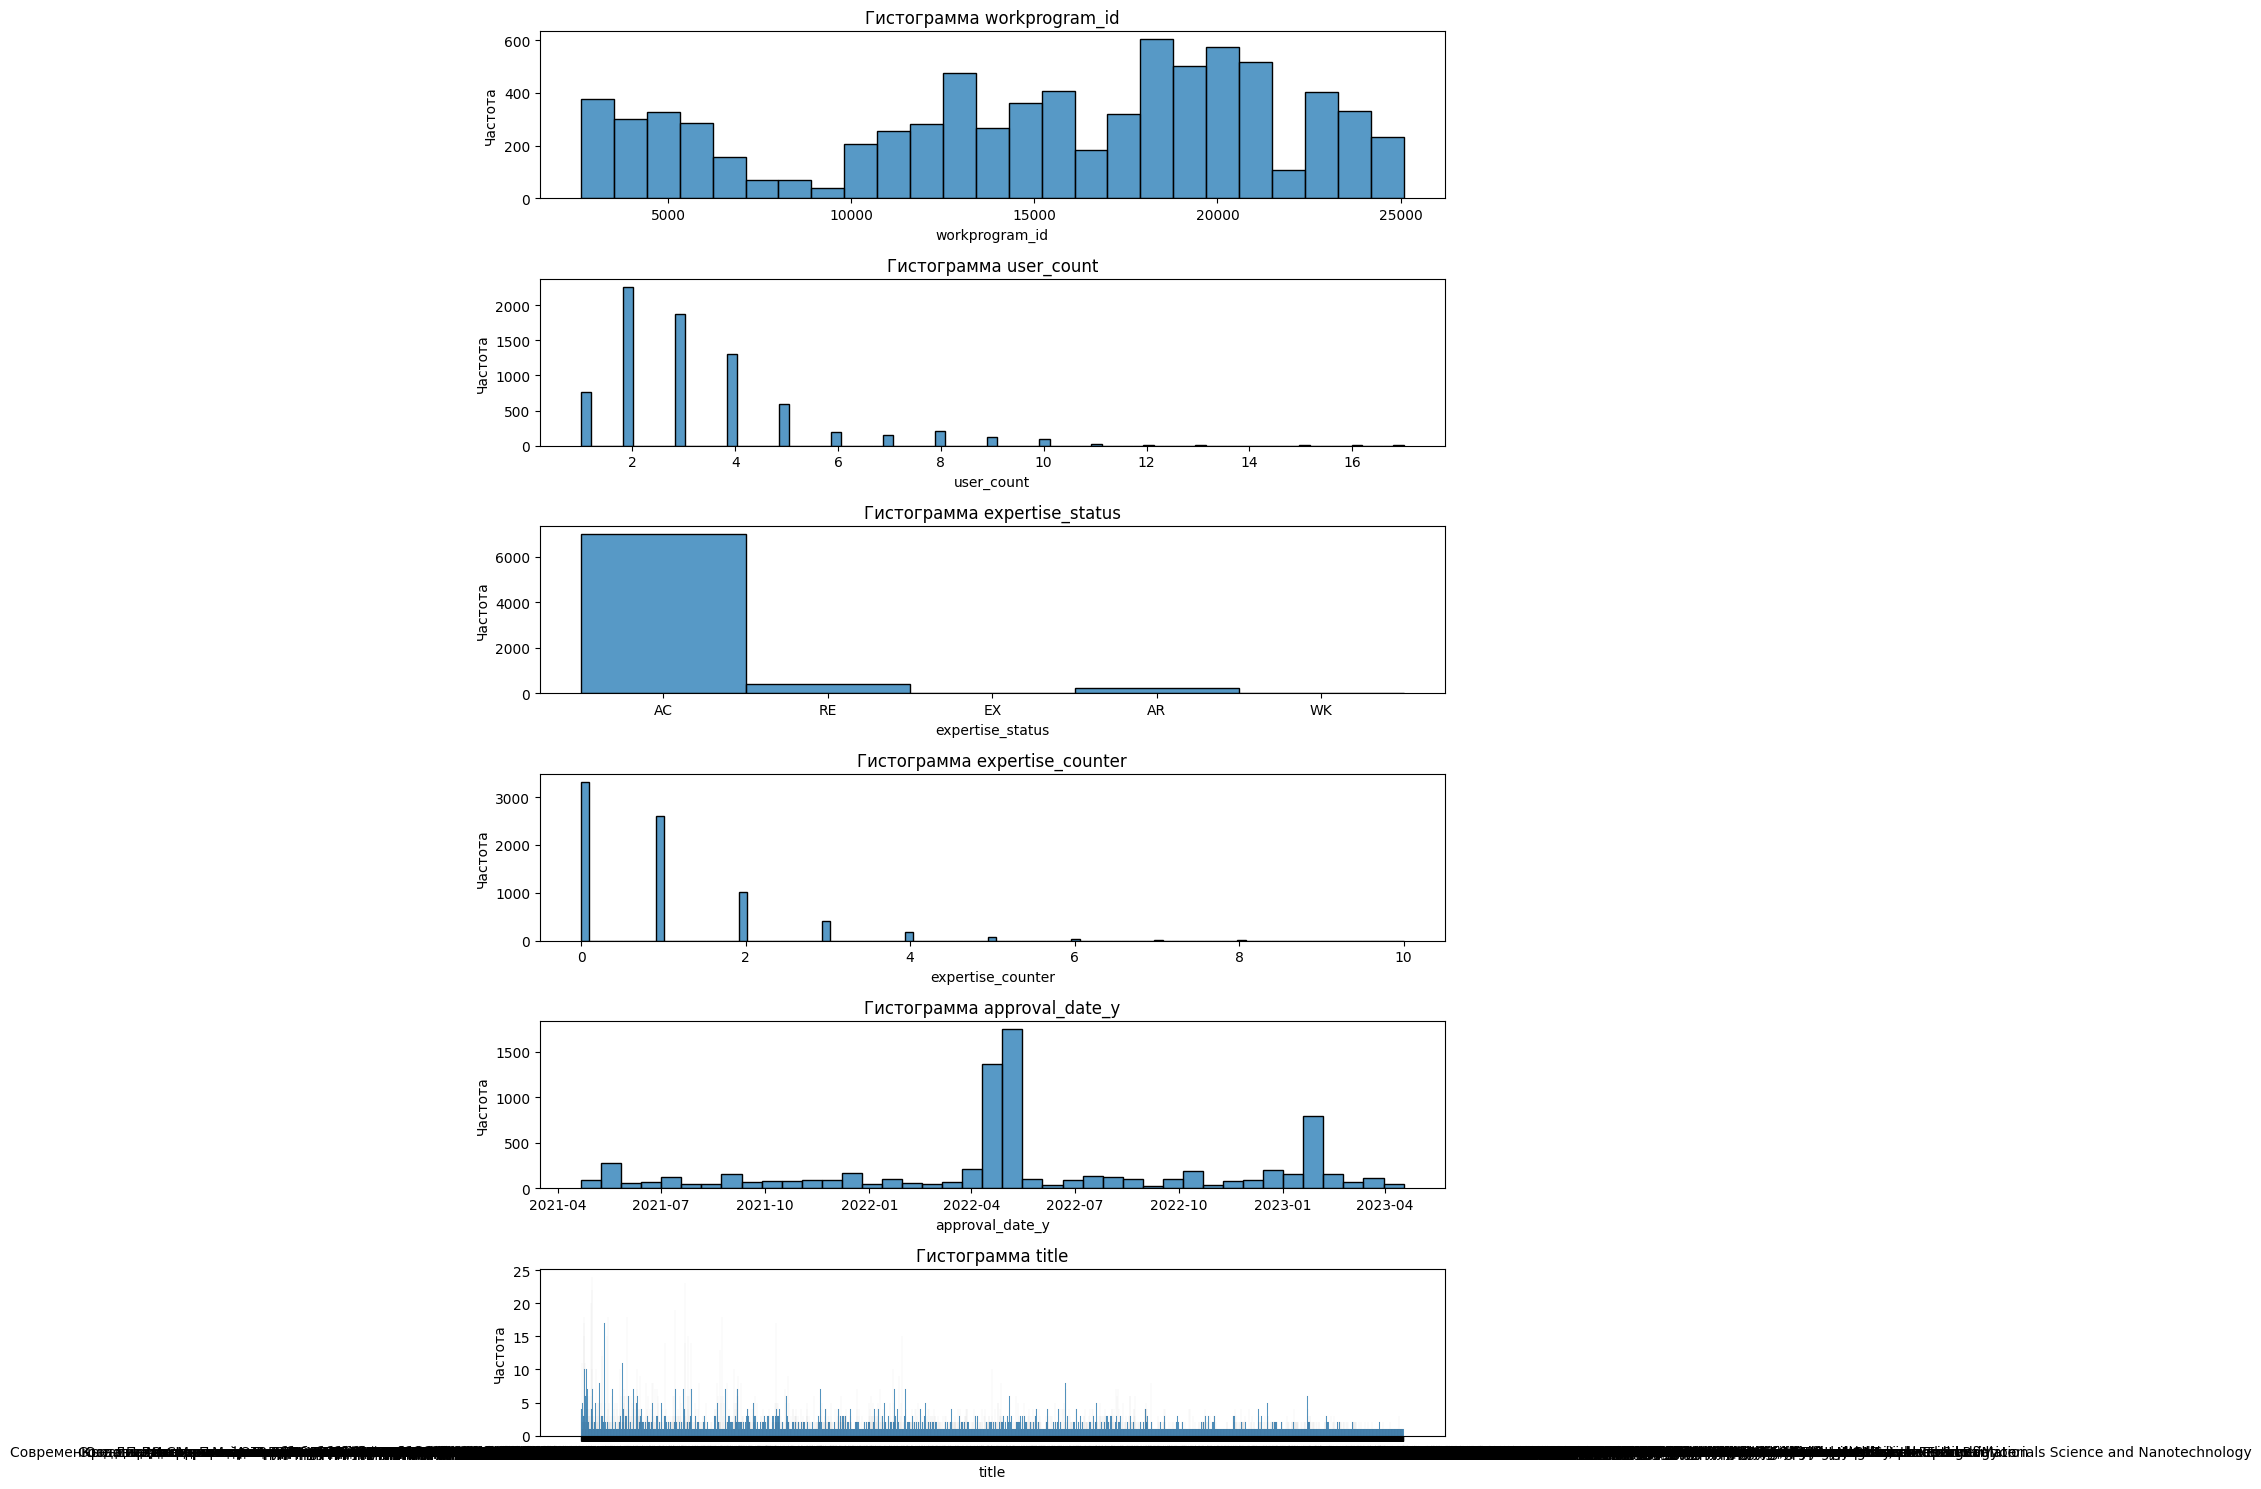

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 15))

# Преобразуем матрицу axes в одномерный массив для удобства
axes = axes.flatten()

# Строим гистограммы для каждого столбца
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i])
    axes[i].set_title(f'Гистограмма {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')

# Удаляем пустые подзаголовки
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
for column in data.columns:
    print(f'Столбец: {column}')
    print(data[column].value_counts())
    print()

Столбец: workprogram_id
2626     1
17716    1
17731    1
17730    1
17727    1
        ..
10553    1
19474    1
10552    1
10551    1
24992    1
Name: workprogram_id, Length: 7657, dtype: int64

Столбец: user_count
2     2263
3     1880
4     1311
1      770
5      597
8      209
6      193
7      153
9      124
10      97
11      25
15      12
12      10
16       6
17       3
13       3
14       1
Name: user_count, dtype: int64

Столбец: expertise_status
AC    7001
RE     416
AR     218
EX      18
WK       4
Name: expertise_status, dtype: int64

Столбец: expertise_counter
0     3320
1     2597
2     1025
3      420
4      182
5       69
6       30
7        9
8        3
10       1
9        1
Name: expertise_counter, dtype: int64

Столбец: approval_date_y
2022-05-06 14:23:17.924000+02:00    1
2022-05-28 16:11:35.872000+02:00    1
2022-04-26 00:48:53.324000+02:00    1
2022-04-30 12:50:50.333000+02:00    1
2022-04-28 22:38:37.271000+02:00    1
                                   ..
2022-02

**Вывод 2**: Кажется, что нетипичных значений нет. Очень много работ с 0 экспертных оценкок, хотя работ с рабочим статусом практически нет. Среди дат не заметно выбросов, видно, что самый богатый на работы период это весна 2022 года.

In [ ]:
# 3. Есть ли нелогичные значения в данных?
data[(data['expertise_status'] == 'WK') & ~data['approval_date_y'].isna()].shape[0]

4

In [ ]:
data[(data['expertise_status'] == 'AC') & (data['expertise_counter'] == 0)].shape[0]

2919

In [ ]:
data[(data['expertise_status'] == 'RE') & (data['expertise_counter'] == 0)].shape[0]

267

In [ ]:
data[(data['expertise_status'] == 'RE') & ~data['approval_date_y'].isna()].shape[0]

416

**Вывод 3**: Есть случаи, где статус "в работе" но есть дата approval_date, то же самое со статусос "на доработке", хотя кажется, что тут работа тоже не может иметь approval_date. Есть случаи, где работа одобрена, но экспертиз у нее 0, то же со статусом "на доработке".

Теперь ответьте на более интересные вопросы с использованием визуализаций.

### 1. Как распределяется количество редакторов рабочих программ на всем периоде наблюдений?

<Axes: title={'center': 'Распределение количества редакторов РПД за весь период'}, xlabel='Дата', ylabel='Количество редакторов'>

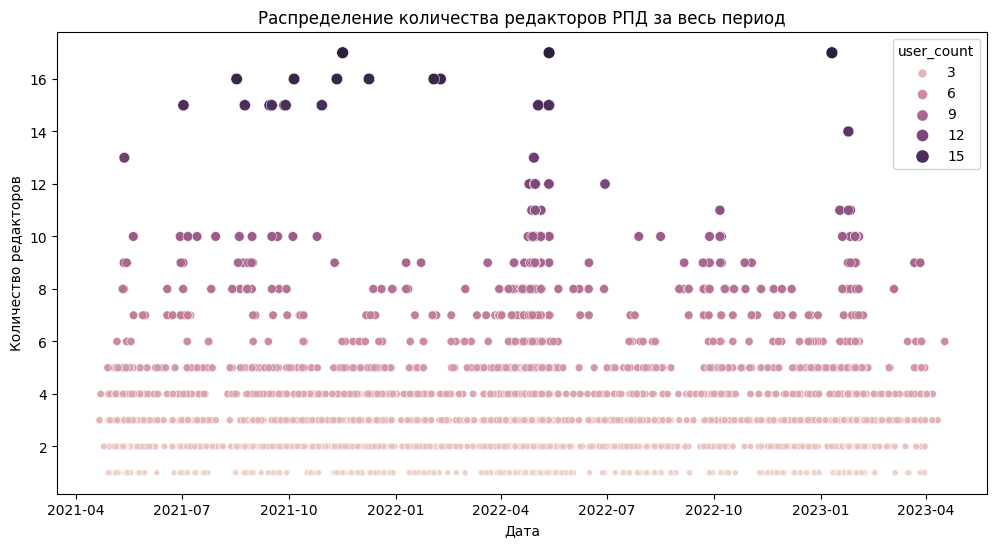

In [111]:
from matplotlib import pyplot
import seaborn

a4_dims = (12, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set(xlabel='Дата', ylabel='Количество редакторов', title = 'Распределение количества редакторов РПД за весь период')
seaborn.scatterplot(ax=ax, data=df, x="date", y="user_count", size="user_count", hue="user_count")

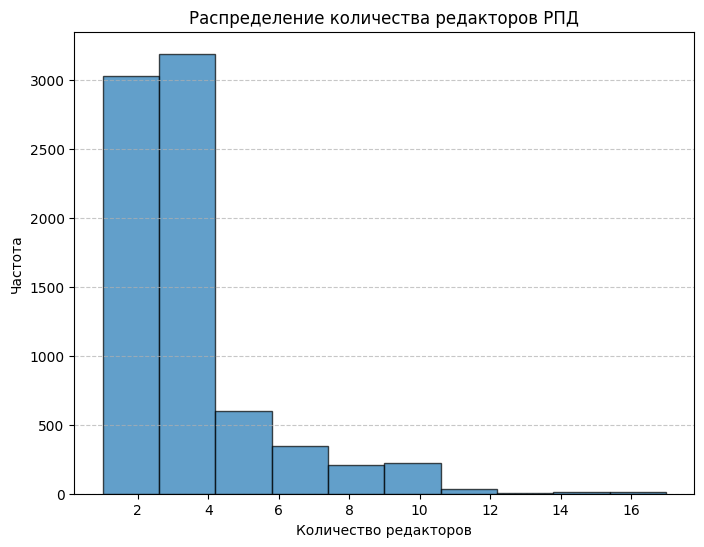

In [112]:
plt.figure(figsize=(8, 6))
plt.hist(df['user_count'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Распределение количества редакторов РПД')
plt.xlabel('Количество редакторов')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Как со временем менялось среднее количество экспертиз РПД?

In [70]:
distribution_average_expertise = df.groupby('dates_only').agg({'expertise_counter' : 'mean'})

fig = go.Figure(data=[go.Bar(x=distribution_average_expertise.index,
                             y=distribution_average_expertise['expertise_counter'])])

fig.show()

In [106]:
distribution_average_expertise_month = distribution_average_expertise
distribution_average_expertise_month.index = pd.to_datetime(distribution_average_expertise_month.index)
distribution_average_expertise_month = distribution_average_expertise.groupby(pd.Grouper(freq='M')).agg({'expertise_counter' : 'mean'})

fig = go.Figure(data=[go.Line(x=distribution_average_expertise_month.index,
                             y=distribution_average_expertise_month['expertise_counter'])])

fig.update_layout(title='Распределение по месяцам',
                  xaxis_title='Месяц',
                  yaxis_title='Среднее количество экспертиз')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### 3. Есть ли зависимость между датой и присвоением статуса "одобрено" (AC)?

In [94]:
distribution_acepted = df.groupby(['dates_only', 'expertise_status']).agg({'expertise_counter' : 'count'}).reset_index()
distribution_acepted['dates_only'] = pd.to_datetime(distribution_acepted['dates_only'])

In [107]:
for cat in distribution_acepted['expertise_status'].unique():
    subset = distribution_acepted[distribution_acepted['expertise_status'] == cat]
    fig.add_trace(go.Bar(x=subset['dates_only'], y=subset['expertise_counter'], name=cat))

fig.update_layout(barmode='group', title="Количество по датам и категориям")
fig.show()

In [118]:
import plotly.express as px

fig = px.histogram(distribution_acepted, x="dates_only", color="expertise_status",
                   marginal="violin",
                   hover_data=distribution_acepted.columns)
fig.update_traces(marker=dict(line=dict(width=1)),
                  selector=dict(type='histogram'))
fig.update_layout(bargap=0.1)
fig.show()

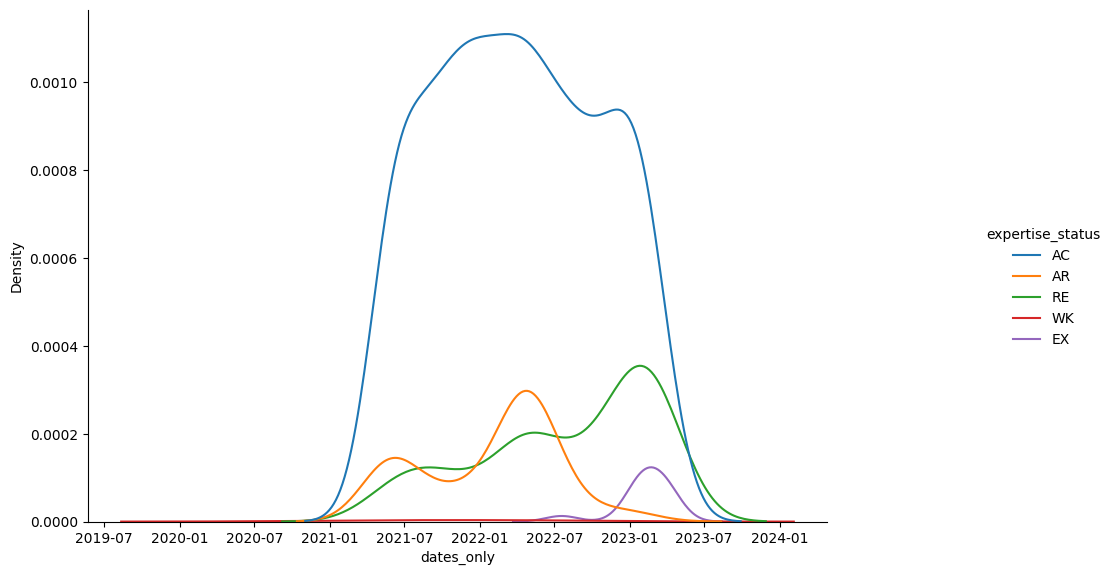

In [125]:
g_diff = sns.displot(data=distribution_acepted, x="dates_only", hue="expertise_status", kind="kde")

g_diff.fig.set_size_inches(12, 6)

In [123]:
df['dates_only'].min()

datetime.date(2021, 4, 21)